In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import shutil
import csv
import whisper


In [ ]:
PATH = "CREMA-D/AudioWAV"  # Path to file wav
OUTPATH = "./redata/"  # Path to file redata


In [112]:
file_emotion = []
file_path = []
anothers_emotion = []
file_text = []


In [113]:
crema_directory_list = os.listdir(PATH)

for file in crema_directory_list:
    # storing file paths
    source_file_path = os.path.join(PATH, file)
    # storing file emotions
    part=file.split('_')
    if part[2] in ['SAD', 'ANG', 'HAP', 'NEU']:
        file_emotion.append(part[2])
        file_path.append(source_file_path)
        # Construct destination folder path
        destination_folder_path = os.path.join(OUTPATH, "audiowav")
        os.makedirs(destination_folder_path, exist_ok=True)  # Create destination folder if not exists
        
        # Construct destination file path
        destination_file_path = os.path.join(destination_folder_path, file)
        
        # Copy the file
        shutil.copy2(source_file_path, destination_file_path)
        

In [82]:
source_file_path = os.path.join(OUTPATH, "audiowav")

for file in os.listdir(source_file_path):
    try:
        file_name = os.path.join(source_file_path, file)    
        model = whisper.load_model("base")
        result = model.transcribe(file_name)
        if not result:
                print(output_file)
        output_file = os.path.join(OUTPATH, "lables")
        # Create destination folder if not exists
        os.makedirs(output_file, exist_ok=True)
        output_file = os.path.join(output_file, file).replace('.wav', '.txt')
        # Output text to a file
        with open(output_file, 'w') as f:
            f.write(result["text"])
            # print(f"Successfully converted speech to text. Transcription saved to: {output_file}")
            file_text.append(result["text"])
    except Exception as e:
        print("Error", file_name)


In [ ]:
source_file_path = os.path.join(OUTPATH, "lables")

for file in os.listdir(source_file_path):
    # Output text to a file
    with open(file, 'r') as f:
        f.read(result["text"])
        # print(f"Successfully converted speech to text. Transcription saved to: {output_file}")
        file_text.append(f.read())


Export Infomation of data

In [114]:
print(len(file_emotion))
print(len(file_text))
print(len(file_path))

4900
0
4900


In [104]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
text_df = pd.DataFrame(file_text, columns=['Content'])
path_df = pd.DataFrame(file_path, columns=['Path'])

Crema_df = pd.concat([path_df, text_df, emotion_df], axis=1)
Crema_df.to_csv(OUTPATH + 'train_data.csv', index=False)
Crema_df.head()


9800


PermissionError: [Errno 13] Permission denied: './redata/train_data.csv'

In [84]:
print(Crema_df['Emotions'].value_counts())
total = 0
for value in Crema_df['Emotions'].value_counts():
    total += value
print(total)


Emotions
ANG    1314
HAP    1314
SAD    1314
NEU    1123
Name: count, dtype: int64
5065


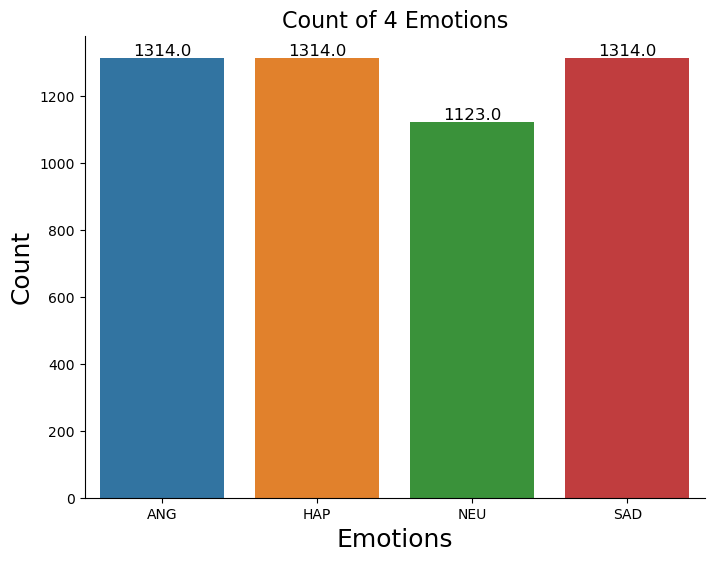

In [85]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=Crema_df, x="Emotions")
plt.title('Count of 4 Emotions', size=16)
plt.ylabel('Count', size=18)
plt.xlabel('Emotions', size=18)
sns.despine(top=True, right=True, left=False, bottom=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()
